In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
port = pd.get_dummies(por, drop_first=True)

# **Portuguese Dataset**

In [4]:
# Train & Test samples for Portuguese

Xp = port.drop('G3', axis=1)
yp = port['G3']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.2, random_state=24)

In [5]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

# **Linear Regression**

In [27]:
# Linear Regression (GridSearchCV)

linear = LinearRegression()
params = {'normalize':[True,False],
         'copy_X':[True,False],
         'n_jobs':[0,1,2,3,4]}

linear_grid = GridSearchCV(linear, params, cv = 5)
linear_grid.fit(Xp_train, yp_train)
print(linear_grid.best_params_)

{'copy_X': True, 'n_jobs': 0, 'normalize': True}


In [6]:
# Linear Regression (Final)

linear_final = LinearRegression(normalize = True, copy_X = True, n_jobs = 0)
linear_final.fit(Xp_train, yp_train)

linear_final_score = cross_val_score(linear_final,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",linear_final_score)

Cross Validation score:  0.8281572825499037


In [7]:
# Linear Regression (Original)

linear = LinearRegression()
linear.fit(Xp_train, yp_train)

linear_score = cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ", linear_score)

Cross Validation score:  0.8281572825499036


# **Ridge**

In [11]:
# Ridge (GridSearchCV)

ridge = Ridge()

params = {'alpha':[1,5,10,11,12,15,20,100, 150, 200, 250],
          'normalize':[True,False],
         'copy_X':[True,False],
         'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid = GridSearchCV(ridge, params, cv = 5)
ridge_grid.fit(Xp_train,yp_train)

print(ridge_grid.best_params_)

{'alpha': 150, 'copy_X': False, 'normalize': False, 'solver': 'saga'}


In [8]:
# Ridge (Final)

ridge_final = Ridge(alpha=150, normalize = False, copy_X = False, solver = 'saga')
ridge_final.fit(Xp_train,yp_train)

ridge_final_score = cross_val_score(ridge_final, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", ridge_final_score)

Cross Validation score:  0.8377627175791375


In [9]:
# Ridge (Original)

ridge = Ridge()
ridge.fit(Xp_train,yp_train)

ridge_score = cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", ridge_score)

Cross Validation score:  0.8288077855634158


# **Lasso**

In [124]:
# Lasso (GridSearchCV)

lasso = Lasso()

params = {'alpha':[0.01,0.1,1,2,3,4,5,6,10],
          'max_iter':[500,1000,1500,2000],
          'normalize':[0.01,0.1,1,2,3,4,5,False],
          'warm_start':[True,False],
         'copy_X':[True,False],
         'selection':['cyclic','random']}

lasso_grid = GridSearchCV(lasso, params, cv = 5)


lasso_grid.fit(Xp_train,yp_train)

print(lasso_grid.best_params_)

{'alpha': 0.1, 'copy_X': False, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'warm_start': True}


In [10]:
# Lasso (Final)

lasso_final = Lasso(alpha = 0.1, max_iter = 1000, normalize = False, warm_start = True,
             copy_X = True, selection = 'random')
lasso_final.fit(Xp_train,yp_train)

lasso_final_score = cross_val_score(lasso_final, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", lasso_final_score)

Cross Validation score:  0.842010941182545


In [11]:
# Lasso (Original)

lasso = Lasso()
lasso.fit(Xp_train,yp_train)

lasso_score = cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("Cross Validation score: ", lasso_score)

Cross Validation score:  0.8316797568325994


# **Random Forest Regression**

In [12]:
# Random Forest Regression (GridSearchCV)

rfr = RandomForestRegressor()
params = {'n_estimators':[100,250,500,750],
          'min_samples_split':list(np.arange(2,10,2)),
          'min_samples_leaf':list(np.arange(2,10,2)),
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'min_impurity_decrease':[0,0.1,0.2,0.5],
          'max_features':['auto','sqrt','log2']}

rfr_grid = GridSearchCV(rfr, params, cv=5)
rfr_grid.fit(Xp_train, yp_train)

print(rfr_grid.best_params_)

{'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_leaf': 6, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}


In [12]:
# Random Forest Regression (Final)

rfr_final = RandomForestRegressor(n_estimators = 100, min_samples_split = 6,
                             min_samples_leaf = 6, min_weight_fraction_leaf=0,
                            min_impurity_decrease = 0, max_features = 'auto' )
rfr_final.fit(Xp_train, yp_train)

random_forest_final_score = cross_val_score(rfr_final,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",random_forest_final_score)

Cross Validation score:  0.8384147371300621


In [13]:
# Random Forest Regression (Original)

rfr = RandomForestRegressor()
rfr.fit(Xp_train, yp_train)

random_forest_score = cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",random_forest_score)

Cross Validation score:  0.8309107584437158


# **Cross Validation Score**

In [14]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [15]:
name = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest']
x_indexes = np.arange(len(name))
width = 0.4


cv_score = [linear_score, ridge_score, lasso_score, random_forest_score]
cv_score_round = [round(score, 4) for score in cv_score]

cv_score_final = [linear_final_score, ridge_final_score, lasso_final_score, random_forest_final_score]
cv_score_final_round = [round(score, 4) for score in cv_score_final]

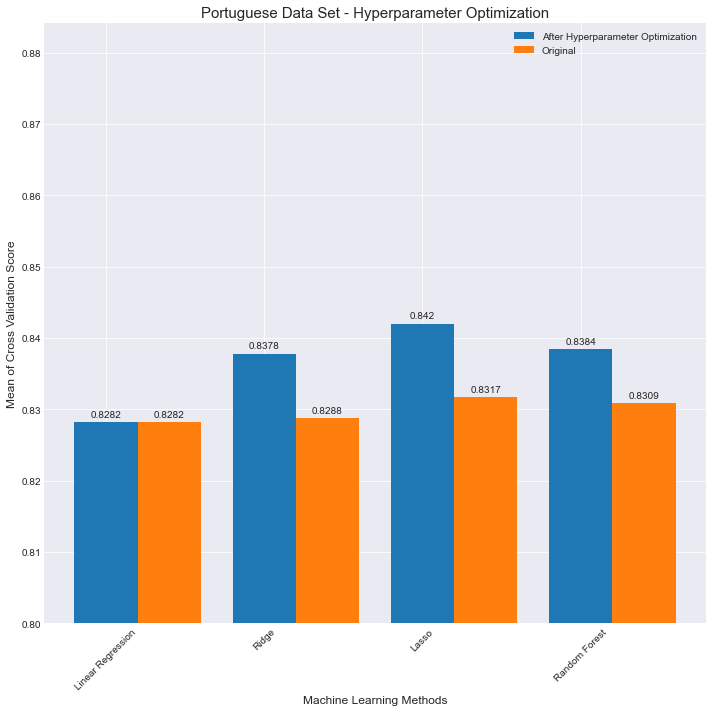

In [16]:
# Cross Validation Score Graph

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10,10))


score_final_graph = ax.bar(x_indexes, cv_score_final_round, width=width, label = 'After Hyperparameter Optimization')
score_graph = ax.bar(x_indexes+width, cv_score_round,width=width, label = 'Original')


autolabel(score_graph)
autolabel(score_final_graph)

ax.set_ylim(bottom=0.8)
ax.set_ylabel("Mean of Cross Validation Score", size=12)

ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(name, rotation=45)

ax.set_title("Portuguese Data Set - Hyperparameter Optimization", size = 15)
plt.legend()

plt.tight_layout()
plt.savefig("Portuguese Data Set - Hyperparameter Optimization.png")
plt.show()

# **Important Features**

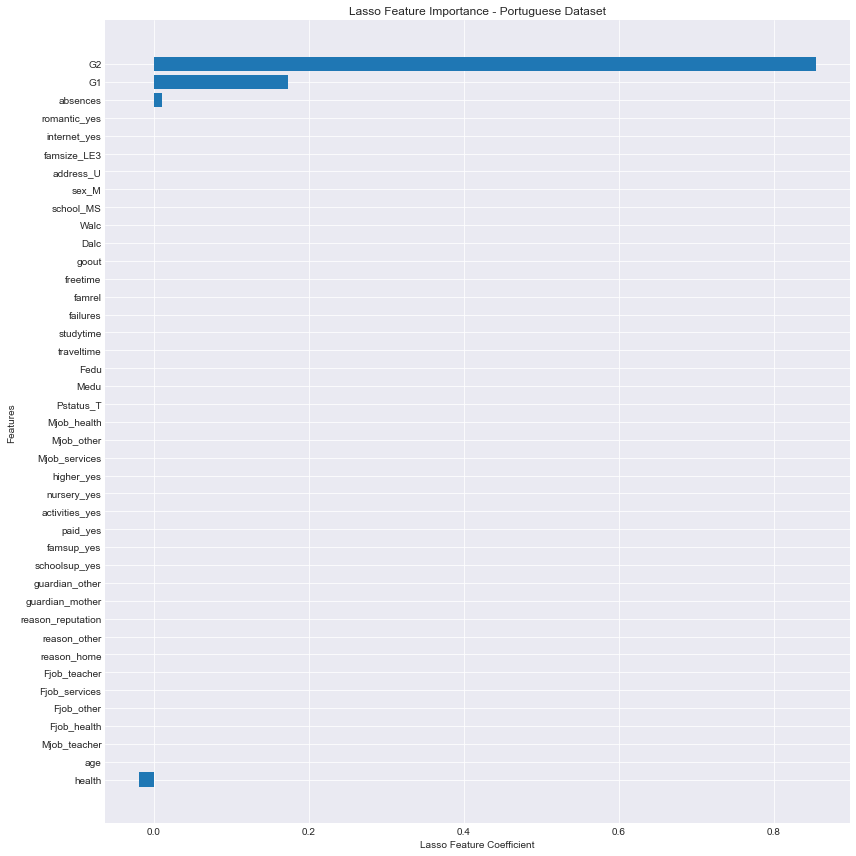

In [17]:
plt.figure(figsize=(12,12))
sorted_idx = lasso_final.coef_.argsort()
x = Xp_train.columns[sorted_idx]
y = lasso_final.coef_[sorted_idx]
plt.barh(x, y)

plt.ylabel('Features')
plt.xlabel("Lasso Feature Coefficient")
plt.title("Lasso Feature Importance - Portuguese Dataset")

plt.tight_layout()
plt.savefig("Lasso Feature Importance - Portuguese Dataset.png")
plt.show()

In [18]:
# Feature Coefficient

feature_coef = dict(zip(x, y))
sort_orders = sorted(feature_coef.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    print(i[0],':', i[1])

G2 : 0.8540143327306511
G1 : 0.17302177416207934
absences : 0.010954302113502568
age : 0.0
Mjob_teacher : 0.0
Fjob_health : 0.0
Fjob_other : -0.0
Fjob_services : 0.0
Fjob_teacher : -0.0
reason_home : -0.0
reason_other : -0.0
reason_reputation : -0.0
guardian_mother : -0.0
guardian_other : 0.0
schoolsup_yes : -0.0
famsup_yes : 0.0
paid_yes : -0.0
activities_yes : -0.0
nursery_yes : -0.0
higher_yes : 0.0
Mjob_services : 0.0
Mjob_other : -0.0
Mjob_health : 0.0
Pstatus_T : -0.0
Medu : 0.0
Fedu : 0.0
traveltime : 0.0
studytime : 0.0
failures : -0.0
famrel : 0.0
freetime : -0.0
goout : 0.0
Dalc : -0.0
Walc : -0.0
school_MS : -0.0
sex_M : -0.0
address_U : 0.0
famsize_LE3 : 0.0
internet_yes : 0.0
romantic_yes : 0.0
health : -0.019415079482056966


# **Predict on Test sample**

In [19]:
yp_pred = lasso_final.predict(Xp_test)

lasso_final_r2_score = r2_score(yp_test, yp_pred)
print("R2 Score:: ",lasso_final_r2_score)

R2 Score::  0.8677298891676171
